### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
# Used Data Wrangler to analyze the data and found that the 'car' column is not useful for analysis as less than 1% of the data has a value in this column.
# Missing values on all other columns are less than 5% so we can drop rows with missing values.
# Also, there are no duplicate rows in the dataset.


3. Decide what to do about your missing data -- drop, replace, other...

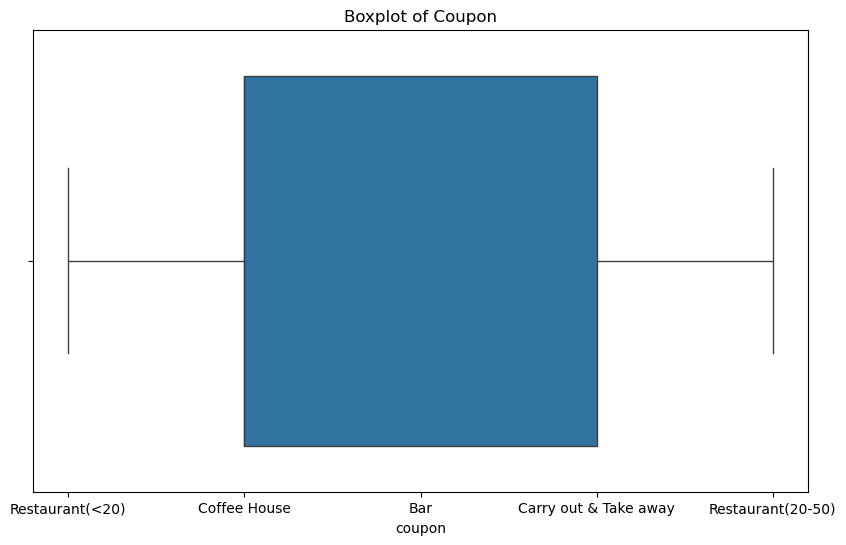

In [6]:
data = data.drop(columns=['car'])
data.head()
# Check for missing values
data.isnull().sum()
# Drop rows with missing values
data = data.dropna()    
data.isnull().sum()
# Check for duplicates
data.duplicated().sum()
# Drop duplicates
data = data.drop_duplicates()
data.duplicated().sum()
# Check data types
data.dtypes 

# Check for outliers in 'Discount' column
plt.figure(figsize=(10, 6)) 
sns.boxplot(x=data['coupon'])
plt.title('Boxplot of Coupon')
plt.show()


4. What proportion of the total observations chose to accept the coupon?



In [7]:
#what percent of total coupons are accepted based on Y column?
accepted_coupons = data[data['Y'] == 1].shape[0]
total_coupons = data.shape[0]   
acceptance_rate = (accepted_coupons / total_coupons) * 100
print(f'Acceptance Rate: {acceptance_rate:.2f}%')




Acceptance Rate: 56.84%


5. Use a bar plot to visualize the `coupon` column.

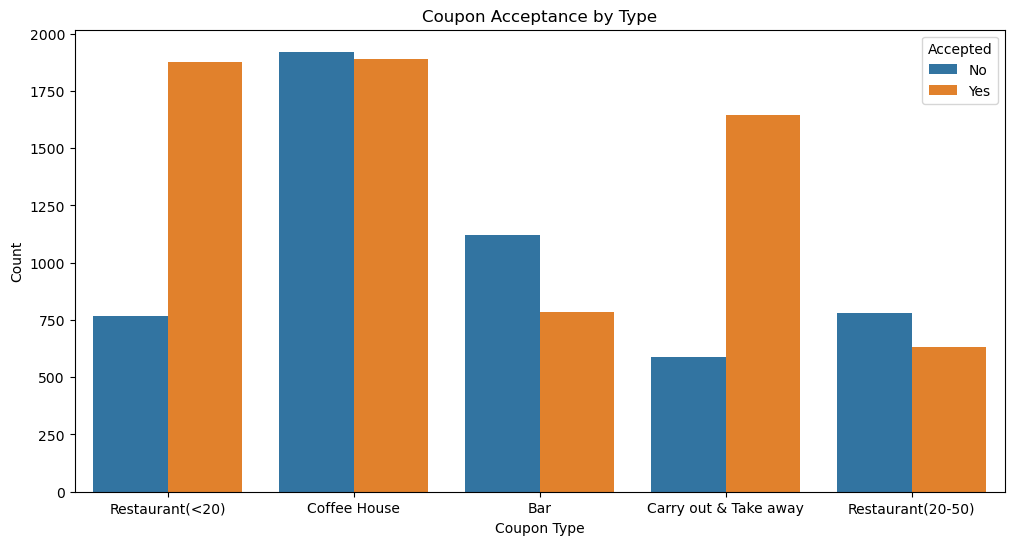

In [36]:
#plot coupon acceptance by type
#plt.savefig('images/coupon_acceptance_by_type.png')
plt.figure(figsize=(12, 6))
sns.countplot(x='coupon', hue='Y', data=data)
plt.title('Coupon Acceptance by Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.savefig('images/coupon_acceptance_by_type.png')
plt.show()




6. Use a histogram to visualize the temperature column.

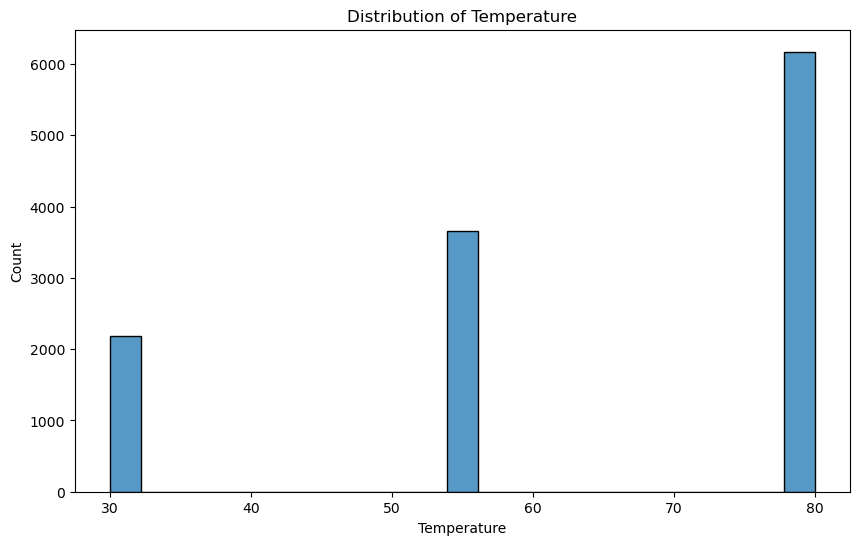

In [9]:
# use a histogram to visualize the temprature column
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'])
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
#create a new DataFrame that contains just the bar total_coupons
bar_data = data[data['coupon'] == 'Bar']
bar_data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


Bar Coupon Acceptance Rate: 41.19%


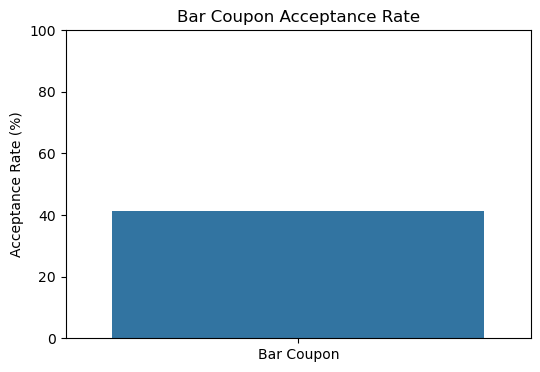

In [37]:
bar_accepted = bar_data.Y.mean()
bar_acceptance_rate = (bar_accepted * 100)
print(f'Bar Coupon Acceptance Rate: {bar_acceptance_rate:.2f}%')
#plot the acceptance_rate
plt.figure(figsize=(6, 4))
sns.barplot(x=['Bar Coupon'], y=[bar_acceptance_rate])
plt.ylim(0, 100)
plt.title('Bar Coupon Acceptance Rate')
plt.ylabel('Acceptance Rate (%)')
plt.savefig('images/bar_coupon_acceptance_rate.png', bbox_inches='tight')
plt.show()




3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [12]:
bar_3_or_fewer = bar_data[bar_data['Bar'] == '1~3']
bar_more_than_3 = bar_data[bar_data['Bar'].isin(['4~8', 'gt8'])]
acceptance_rate_3_or_fewer = bar_3_or_fewer['Y'].mean() * 100
acceptance_rate_more_than_3 = bar_more_than_3['Y'].mean() * 100
print(f'Acceptance Rate (3 or fewer visits): {acceptance_rate_3_or_fewer:.2f}%')
print(f'Acceptance Rate (more than 3 visits): {acceptance_rate_more_than_3:.2f}%')

# Acceptance rate for 3 or fewer visit is smaller than more than 3 visits. So, drivers who visit a bar more frequently are more likely to accept a coupon.

Acceptance Rate (3 or fewer visits): 64.64%
Acceptance Rate (more than 3 visits): 76.17%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [13]:
bar_over_25 = bar_data[(~bar_data['Bar'].isin(['never', 'less1'])) & (bar_data['age'] != 'below21') & (bar_data['age'] != '21')]
acceptance_rate_bar_over_25 = bar_over_25['Y'].mean() * 100
all_others = bar_data[~bar_data.index.isin(bar_over_25.index)]
acceptance_rate_all_others = all_others['Y'].mean() * 100
print(f'Acceptance Rate (Bar > once a month & Age > 25): {acceptance_rate_bar_over_25:.2f}%')
print(f'Acceptance Rate (All Others): {acceptance_rate_all_others:.2f}%')
# Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is higher than all others. So, these drivers are more likely to accept a coupon.

Acceptance Rate (Bar > once a month & Age > 25): 68.98%
Acceptance Rate (All Others): 33.73%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [14]:
# Use the same process to compare the acceptance rate between drivers who go to bars more than once a month,
# had passengers that were not a kid, and had occupations other than farming, fishing, or forestry.
bar_data['occupation'].unique()
# Filter for bar_data where Bar visits are more than once a month
bar_more_than_once = bar_data[~bar_data['Bar'].isin(['never', 'less1'])]

# Exclude passengers that are 'Kid(s)'
bar_no_kids = bar_more_than_once[bar_more_than_once['passanger'] != 'Kid(s)']

# Exclude occupations 'Farming, Fishing & Forestry'
excluded_occupations = ['Farming & Fishing & Forestry', 'Farming, Fishing & Forestry']
bar_final = bar_no_kids[~bar_no_kids['occupation'].isin(excluded_occupations)]
bar_rest =  bar_data[~bar_data.index.isin(bar_final.index)]
# Calculate acceptance rate
acceptance_rate_bar_final = bar_final['Y'].mean() * 100
acceptance_rate_bar_rest = bar_rest['Y'].mean() * 100

print(f'Acceptance Rate (Bar > once/month, no kids, not farming/fishing/forestry): {acceptance_rate_bar_final:.2f}%')
print(f'Acceptance Rate (All Others): {acceptance_rate_bar_rest:.2f}%')

#Drivers who go to bars more than once a month, do not have kids, and have occupations other than farming, fishing, or forestry have a higher acceptance rate compared to all others. 
# i.e. these drivers are more likely to accept a coupon.


Acceptance Rate (Bar > once/month, no kids, not farming/fishing/forestry): 70.94%
Acceptance Rate (All Others): 29.72%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [15]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# Filter for bar_data where Bar visits are more than once a month
bar_more_than_once = bar_data[~bar_data['Bar'].isin(['never', 'less1'])]
bar_more_than_once.head()   
bar_more_than_once['passanger'].unique()
# Exclude passengers that are 'Kid(s)'  
bar_no_kids = bar_more_than_once[bar_more_than_once['passanger'] != 'Kid(s)']
bar_no_kids.head()  
bar_no_kids['maritalStatus'].unique()
# Exclude maritalStatus 'Widowed'   
bar_not_widowed = bar_no_kids[bar_no_kids['maritalStatus'] != 'Widowed']
bar_not_widowed.head()
#go to bars more than once a month and are under the age of 30
bar_under_30 = bar_more_than_once[bar_more_than_once['age'].isin(['below21', '21', '26-30'])]
bar_under_30.head() 
#go to cheap restaurants more than 4 times a month and income is less than 50K.
data['restaurant'] = data['RestaurantLessThan20'].astype(str)
cheap_restaurant_data = data[(data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (data['income'].isin(['< $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))]
cheap_restaurant_data.head()
# Compare acceptance rates for these 3 groups
    

acceptance_rate_bar_not_widowed = bar_not_widowed['Y'].mean() * 100
acceptance_rate_bar_under_30 = bar_under_30['Y'].mean() * 100   
acceptance_rate_cheap_restaurant = cheap_restaurant_data['Y'].mean() * 100   
print(f'Acceptance Rate (Bar > once/month, no kids, not widowed): {acceptance_rate_bar_not_widowed:.2f}%')
print(f'Acceptance Rate (Bar < 30): {acceptance_rate_bar_under_30:.2f}%')
print(f'Acceptance Rate (cheap restaurants): {acceptance_rate_cheap_restaurant:.2f}%')
# Drivers who go to bars more than once a month, do not have kids, and are not widowed have a higher acceptance rate compared to all others.    

Acceptance Rate (Bar > once/month, no kids, not widowed): 70.94%
Acceptance Rate (Bar < 30): 67.46%
Acceptance Rate (cheap restaurants): 59.56%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

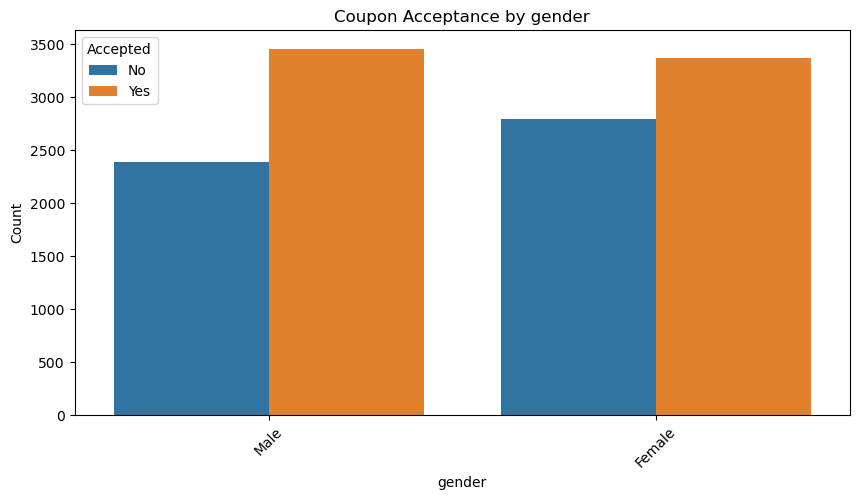

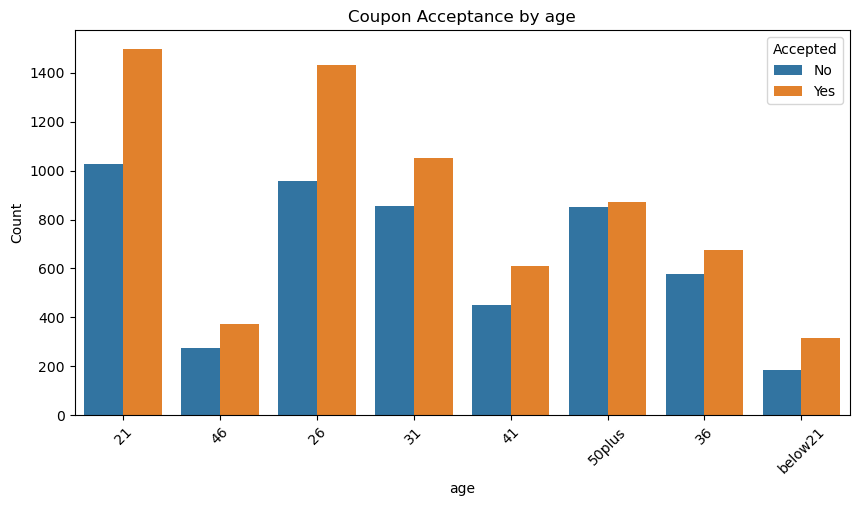

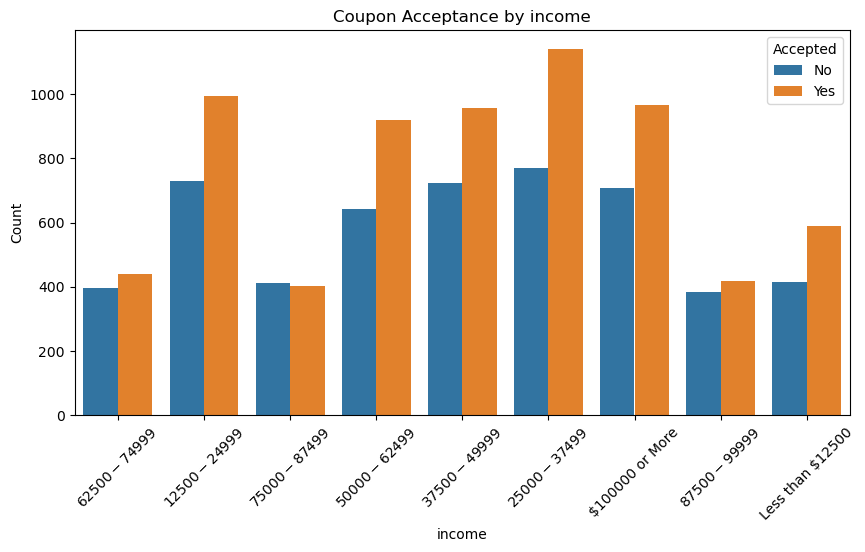

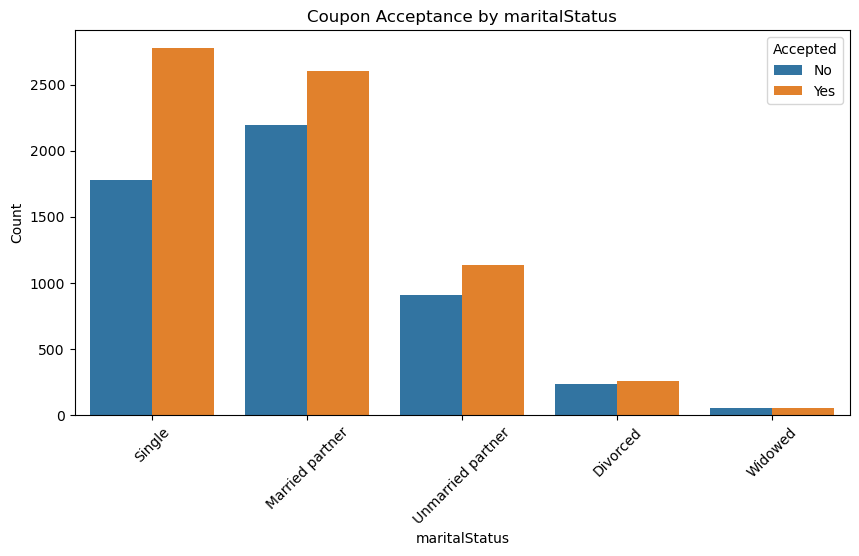

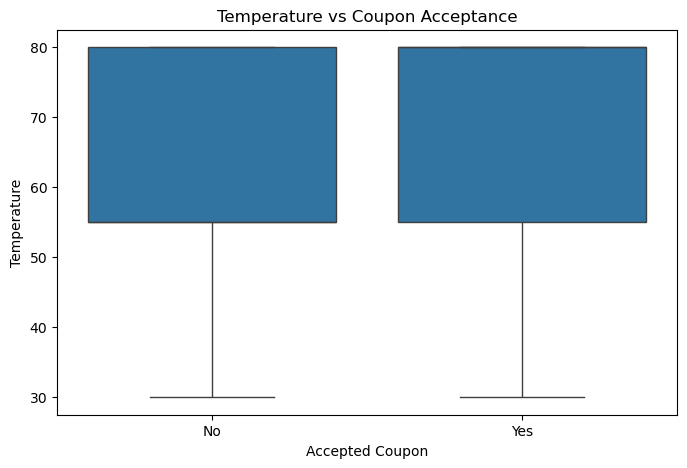

In [38]:
# Visualize Y vs categorical variables using countplots
categorical_vars = ['gender', 'age', 'income', 'maritalStatus']
for var in categorical_vars:
	plt.figure(figsize=(10, 5))
	sns.countplot(x=var, hue='Y', data=data)
	plt.title(f'Coupon Acceptance by {var}')
	plt.xlabel(var)
	plt.ylabel('Count')
	plt.legend(title='Accepted', labels=['No', 'Yes'])
	plt.xticks(rotation=45)
	plt.savefig(f'images/coupon_acceptance_by_{var}.png')
	plt.show()
	


# For the numeric variable 'temperature', use a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Y', y='temperature', data=data)
plt.title('Temperature vs Coupon Acceptance')
plt.xlabel('Accepted Coupon')
plt.ylabel('Temperature')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


Acceptance Rate (Dine-In): 62.64%
Acceptance Rate (Take-Out): 58.17%


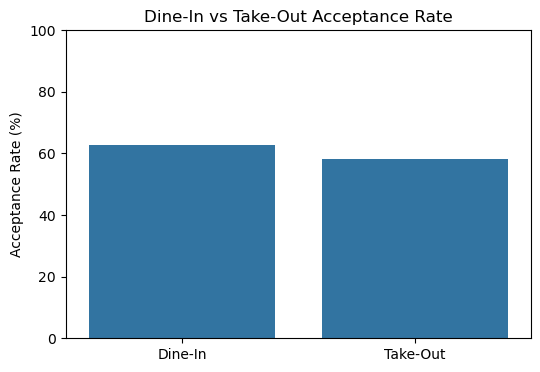

In [39]:
#compare the acceptance rate between dine in vs take out coupons.
# Filter data for 'Restaurant' coupons
restaurant_data = data[~data['coupon'].isin(['Carry out & Take away', 'Coffee House', 'Bar'])]
restaurant_data.head()
# Acceptance rate for dine-in vs take-out
dine_in = restaurant_data[restaurant_data['RestaurantLessThan20'].isin(['1~3', '4~8', 'gt8'])]
take_out = restaurant_data[restaurant_data['RestaurantLessThan20'].isin(['never', 'less1'])]
acceptance_rate_dine_in = dine_in['Y'].mean() * 100
acceptance_rate_take_out = take_out['Y'].mean() * 100
print(f'Acceptance Rate (Dine-In): {acceptance_rate_dine_in:.2f}%')
print(f'Acceptance Rate (Take-Out): {acceptance_rate_take_out:.2f}%')
# Drivers who use dine-in coupons have a higher acceptance rate compared to those who use take-out coupons.

#plot the acceptance_rate of dine-in vs take-out
plt.figure(figsize=(6, 4))
sns.barplot(x=['Dine-In', 'Take-Out'], y=[acceptance_rate_dine_in, acceptance_rate_take_out])
plt.ylim(0, 100)
plt.title('Dine-In vs Take-Out Acceptance Rate')
plt.ylabel('Acceptance Rate (%)')
plt.savefig('images/dine_in_vs_take_out_acceptance_rate.png', bbox_inches='tight')
plt.show()



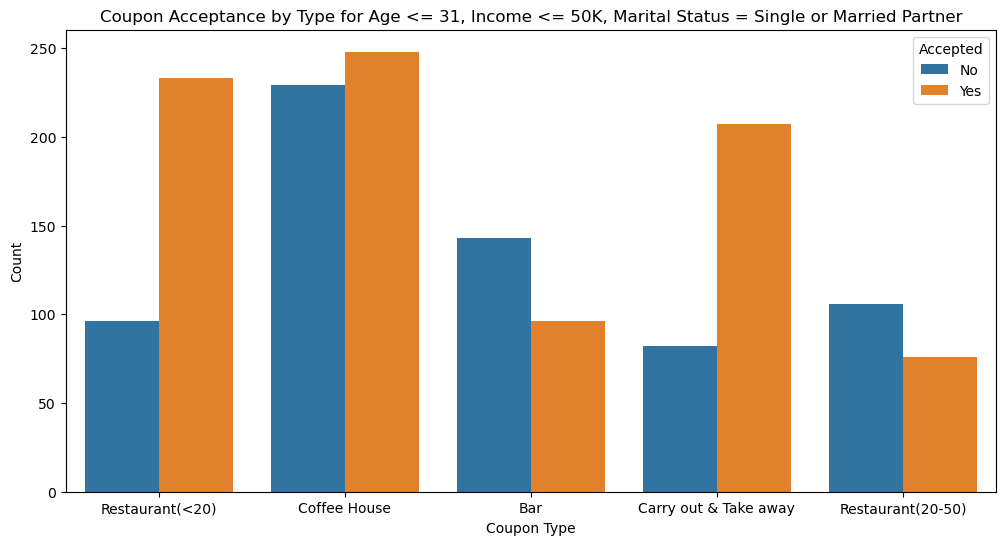

Acceptance Rate (Restaurant(<20)): 70.82%
Acceptance Rate (Coffee House): 51.99%
Acceptance Rate (Bar): 40.17%
Acceptance Rate (Carry out & Take away): 71.63%
Acceptance Rate (Restaurant(20-50)): 41.76%


In [22]:
# visualie the acceptance_rate for age <= 31, income <= 50K, and maritalStatus = 'Single' or 'married partner' with type of total_coupons
filtered_data = data[
    (data['age'].isin(['below21', '21', '26-30', '31'])) &
    (data['income'].isin(['< $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])) &
    (data['maritalStatus'].isin(['Single', 'Married partner']))
]
plt.figure(figsize=(12, 6)) 
sns.countplot(x='coupon', hue='Y', data=filtered_data)
plt.title('Coupon Acceptance by Type for Age <= 31, Income <= 50K, Marital Status = Single or Married Partner')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.show()
# Acceptance rate for each coupon type in the filtered data
for coupon_type in filtered_data['coupon'].unique():
    coupon_subset = filtered_data[filtered_data['coupon'] == coupon_type]
    acceptance_rate = coupon_subset['Y'].mean() * 100
    print(f'Acceptance Rate ({coupon_type}): {acceptance_rate:.2f}%')       
# Drivers who are 31 or younger, have an income of 50K or less, and are either single or married partners have a higher acceptance rate for certain coupon types, such as Coffee House and Carry out & Take away.
# Analyze the dataset to find patterns in coupon acceptance based on various features.
# Based on the analysis, drivers who visit bars more frequently, dine in at restaurants, and fall within certain demographic groups (younger age, lower income, specific marital status) are more likely to accept coupons. 
# The insights gained from this analysis can help in targeting specific customer segments for coupon distribution to maximize acceptance rates.
